Sara Rahman

ID: 2122081642

## Question 2(b)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

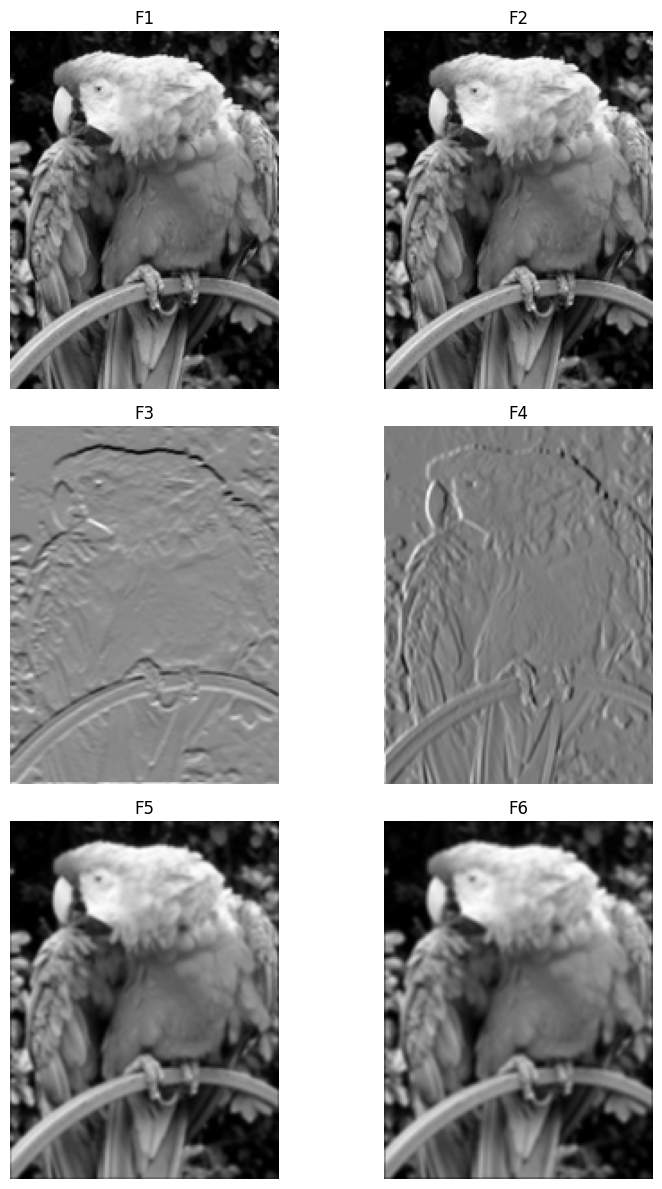

In [ ]:

img = Image.open('/content/parrot.png')
img_arr= np.asarray(img,float)   #here cnvrting the img to an array
pad_width = (1,1)  #padding added
pad_img_arr = np.pad(img_arr, pad_width, mode= 'constant', constant_values=0)

f1 = np.array([[0,0,0], [0,1,0], [0,0,0]])
f1_trans= np.transpose(f1)

f2 = np.array([[1,0,0], [0,0,0], [0,0,0]])
f2_trans= np.transpose(f2)

f3 = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
f3_trans= np.transpose(f3)

f4 = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
f4_trans= np.transpose(f4)

f5 = np.array([[1,2,1], [2,4,2], [1,2,1]])*(1/16)
f5_trans= np.transpose(f5)

f6 = np.array([[1,1,1], [1,1,1], [1,1,1]])*(1/9)
f6_trans= np.transpose(f6)

G1 = np.zeros_like(img_arr);  #making the G1 array with zero values
G2 = np.zeros_like(img_arr);
G3 = np.zeros_like(img_arr);
G4 = np.zeros_like(img_arr);
G5 = np.zeros_like(img_arr);
G6 = np.zeros_like(img_arr);

#for the dot prod of Filters with Padded I
for i in range(len(G1)):
  for j in range(len(G1[0])):
    for k in range(len(f1_trans)):
      for l in range(len(f1_trans[0])):
        G1[i,j]+= f1_trans[k,l]*pad_img_arr[i+l, j+k]
        G2[i,j]+= f2_trans[k,l]*pad_img_arr[i+l, j+k]
        G3[i,j]+= f3_trans[k,l]*pad_img_arr[i+l, j+k]
        G4[i,j]+= f4_trans[k,l]*pad_img_arr[i+l, j+k]
        G5[i,j]+= f5_trans[k,l]*pad_img_arr[i+l, j+k]
        G6[i,j]+= f6_trans[k,l]*pad_img_arr[i+l, j+k]

fig,axes= plt.subplots(3,2, figsize=(10,12))
flat_axes= axes.flatten()
filtered_img= [G1,G2,G3,G4,G5,G6]

for i, image in enumerate(filtered_img):
  flat_axes[i].imshow(image, cmap='gray')
  flat_axes[i].set_title(f"F{i+1}")
  flat_axes[i].axis('off')
  plt.tight_layout()

plt.show()





# Part B (Question-3)
## a & b

### rangeData_5_5_180

Splitting at depth 0, maxDist = 5.4816


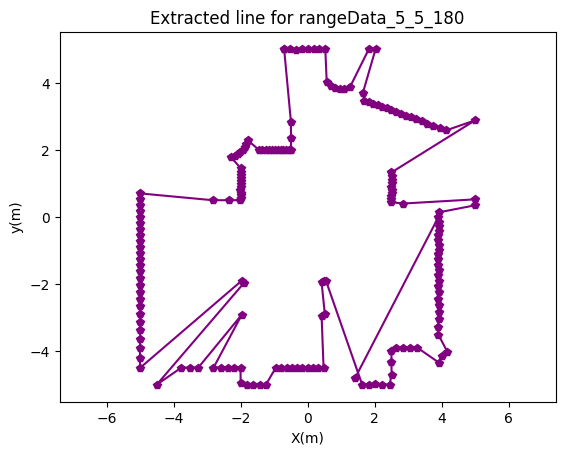

The parameters I have chosen for 
LINE_POINT_DIST_THRESHOLD:  1 
LINE_POINT_DIST_THRESHOLD:  2 
MIN_SEG_LENGTH:  0.6 
MAX_P2P_DIST  0.4


In [ ]:
# to load the rangeData_5_5_180
range_dt1= pd.read_csv('/content/rangeData_5_5_180 - rangeData_5_5_180.csv.csv', header=None).values

#defining the segment parameters
LINE_POINT_DIST_THRESHOLD = 1
MIN_POINTS_PER_SEGMENT = 2
MIN_SEG_LENGTH = 0.6
MAX_P2P_DIST = 0.4

def split_and_merge(range_data,  line_point_dist_threshold, min_points_per_segment, min_seg_length, max_p2p_dist):
  #converting polar to cartesian
  theta= range_data[:,0] # theta in radian
  rho= range_data[:,1] #for distance
  x = rho * np.cos(theta)
  y = rho * np.sin(theta)
  points= np.column_stack((x,y))

  #Recursive function for splitting with added depth limit
  max_depth = 100  #to prevent infinite recursion

  def recursive_split(points, depth):
    if points.shape[0] <min_points_per_segment or depth> max_depth:
      return [points]

    #fit the points to make a line
    coeff= np.polyfit(points[:,0], points[:,1], 1)
    line_func= lambda x: coeff[0]* x+coeff[1]

    #to compute perpendicular distances
    distances= np.abs(points[:,1] -line_func(points[:,0]))/ np.sqrt(1 + coeff[0]**2)
    max_dist = np.max(distances)
    max_idx = np.argmax(distances)

    if max_dist> line_point_dist_threshold and 0<max_idx<points.shape[0] -1:
       print(f'Splitting at depth {depth}, maxDist = {max_dist:.4f}')
       segments1 = recursive_split(points[:max_idx + 1], depth + 1)
       segments2 = recursive_split(points[max_idx:], depth + 1)
       return segments1 + segments2
    else:
        return [points]

  #initial split
  raw_segments= recursive_split(points,0)

  #filter and merge segements
  filtered_segments= []
  for seg in raw_segments:
      if seg.shape[0]>= min_points_per_segment and np.sqrt((seg[-1, 0] - seg[0, 0])**2 + (seg[-1, 1] - seg[0, 1])**2) >= min_seg_length:
        filtered_segments.append(seg)

  return filtered_segments

def plot_segments(segments,title_text):
  plt.figure()
  for seg in segments:
      plt.plot(seg[:,0], seg[:,1], '-p', color='purple')

  plt.title(title_text)
  plt.xlabel('X(m)')
  plt.ylabel('y(m)')
  plt.axis('equal')
  plt.show()

#for processing the data
lines1= split_and_merge(range_dt1, LINE_POINT_DIST_THRESHOLD, MIN_POINTS_PER_SEGMENT, MIN_SEG_LENGTH, MAX_P2P_DIST)
plot_segments(lines1, 'Extracted line for rangeData_5_5_180')

print('The parameters I have chosen for \nLINE_POINT_DIST_THRESHOLD: ',LINE_POINT_DIST_THRESHOLD,
      '\nLINE_POINT_DIST_THRESHOLD: ',MIN_POINTS_PER_SEGMENT,
   '\nMIN_SEG_LENGTH: ',MIN_SEG_LENGTH,
 '\nMAX_P2P_DIST ',MAX_P2P_DIST)

### rangeData_4_9_360

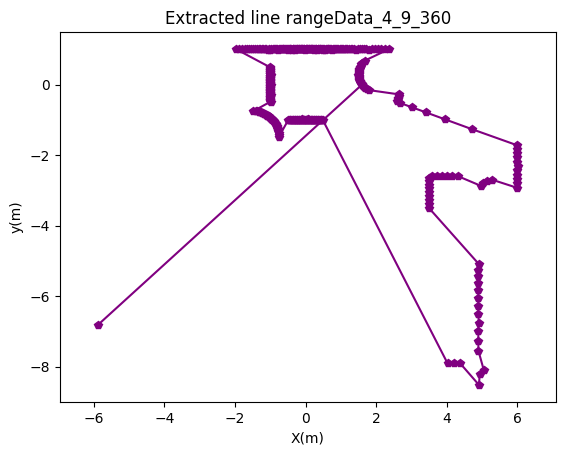

The parameters I have chosen for 
LINE_POINT_DIST_THRESHOLD:  0.5 
LINE_POINT_DIST_THRESHOLD:  3 
MIN_SEG_LENGTH:  0.4 
MAX_P2P_DIST  0.2


In [ ]:
# to load the rangeData_4_9_360
range_dt1= pd.read_csv('/content/rangeData_4_9_360 - rangeData_4_9_360.csv.csv', header=None).values

#defining the segment parameters
LINE_POINT_DIST_THRESHOLD = 0.5
MIN_POINTS_PER_SEGMENT = 3
MIN_SEG_LENGTH = 0.4
MAX_P2P_DIST = 0.2

def split_and_merge(range_data,  line_point_dist_threshold, min_points_per_segment, min_seg_length, max_p2p_dist):
  #converting polar to cartesian
  theta= range_data[:,0] # theta in radian
  rho= range_data[:,1] #for distance
  x = rho * np.cos(theta)
  y = rho * np.sin(theta)
  points= np.column_stack((x,y))

  #Recursive function for splitting with added depth limit
  max_depth = 100  #to prevent infinite recursion

  def recursive_split(points, depth):
    if points.shape[0] <min_points_per_segment or depth> max_depth:
      return [points]

    #fit the points to make a line
    coeff= np.polyfit(points[:,0], points[:,1], 1)
    line_func= lambda x: coeff[0]* x+coeff[1]

    #to compute perpendicular distances
    distances= np.abs(points[:,1] -line_func(points[:,0]))/ np.sqrt(1 + coeff[0]**2)
    max_dist = np.max(distances)
    max_idx = np.argmax(distances)

    if max_dist> line_point_dist_threshold and 0<max_idx<points.shape[0] -1:
       print(f'Splitting at depth {depth}, maxDist = {max_dist:.4f}')
       segments1 = recursive_split(points[:max_idx + 1], depth + 1)
       segments2 = recursive_split(points[max_idx:], depth + 1)
       return segments1 + segments2
    else:
        return [points]

  #initial split
  raw_segments= recursive_split(points,0)

  #filter and merge segements
  filtered_segments= []
  for seg in raw_segments:
      if seg.shape[0]>= min_points_per_segment and np.sqrt((seg[-1, 0] - seg[0, 0])**2 + (seg[-1, 1] - seg[0, 1])**2) >= min_seg_length:
        filtered_segments.append(seg)

  return filtered_segments

def plot_segments(segments,title_text):
  plt.figure()
  for seg in segments:
      plt.plot(seg[:,0], seg[:,1], '-p', color='purple')

  plt.title(title_text)
  plt.xlabel('X(m)')
  plt.ylabel('y(m)')
  plt.axis('equal')
  plt.show()

#for processing the data
lines1= split_and_merge(range_dt1, LINE_POINT_DIST_THRESHOLD, MIN_POINTS_PER_SEGMENT, MIN_SEG_LENGTH, MAX_P2P_DIST)
plot_segments(lines1, 'Extracted line rangeData_4_9_360')

print('The parameters I have chosen for \nLINE_POINT_DIST_THRESHOLD: ',LINE_POINT_DIST_THRESHOLD,
      '\nLINE_POINT_DIST_THRESHOLD: ',MIN_POINTS_PER_SEGMENT,
   '\nMIN_SEG_LENGTH: ',MIN_SEG_LENGTH,
 '\nMAX_P2P_DIST ',MAX_P2P_DIST)

### rangeData_7_2_90

Splitting at depth 0, maxDist = 6.8521
Splitting at depth 1, maxDist = 1.0657
Splitting at depth 2, maxDist = 0.8460


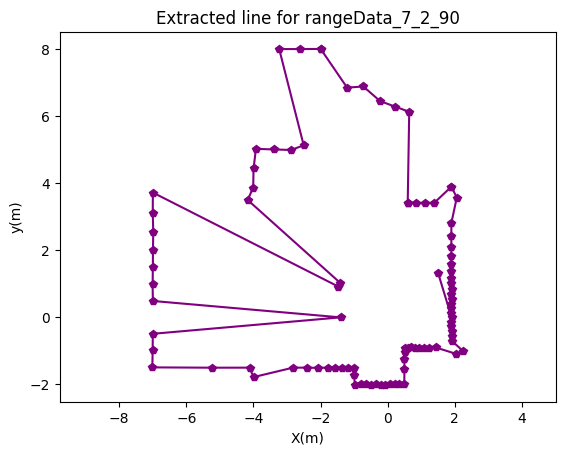

The parameters I have chosen for 
LINE_POINT_DIST_THRESHOLD:  0.3 
LINE_POINT_DIST_THRESHOLD:  4 
MIN_SEG_LENGTH:  0.6 
MAX_P2P_DIST  0.4


In [ ]:
# to load the rangeData_7_2_90
range_dt1= pd.read_csv('/content/rangeData_7_2_90 - rangeData_7_2_90.csv.csv', header=None).values

#defining the segment parameters
LINE_POINT_DIST_THRESHOLD = 0.3
MIN_POINTS_PER_SEGMENT = 4
MIN_SEG_LENGTH = 0.6
MAX_P2P_DIST = 0.4

def split_and_merge(range_data,  line_point_dist_threshold, min_points_per_segment, min_seg_length, max_p2p_dist):
  #converting polar to cartesian
  theta= range_data[:,0] # theta in radian
  rho= range_data[:,1] #for distance
  x = rho * np.cos(theta)
  y = rho * np.sin(theta)
  points= np.column_stack((x,y))

  #Recursive function for splitting with added depth limit
  max_depth = 100  #to prevent infinite recursion

  def recursive_split(points, depth):
    if points.shape[0] <min_points_per_segment or depth> max_depth:
      return [points]

    #fit the points to make a line
    coeff= np.polyfit(points[:,0], points[:,1], 1)
    line_func= lambda x: coeff[0]* x+coeff[1]

    #to compute perpendicular distances
    distances= np.abs(points[:,1] -line_func(points[:,0]))/ np.sqrt(1 + coeff[0]**2)
    max_dist = np.max(distances)
    max_idx = np.argmax(distances)

    if max_dist> line_point_dist_threshold and 0<max_idx<points.shape[0] -1:
       print(f'Splitting at depth {depth}, maxDist = {max_dist:.4f}')
       segments1 = recursive_split(points[:max_idx + 1], depth + 1)
       segments2 = recursive_split(points[max_idx:], depth + 1)
       return segments1 + segments2
    else:
        return [points]

  #initial split
  raw_segments= recursive_split(points,0)

  #filter and merge segements
  filtered_segments= []
  for seg in raw_segments:
      if seg.shape[0]>= min_points_per_segment and np.sqrt((seg[-1, 0] - seg[0, 0])**2 + (seg[-1, 1] - seg[0, 1])**2) >= min_seg_length:
        filtered_segments.append(seg)

  return filtered_segments

def plot_segments(segments,title_text):
  plt.figure()
  for seg in segments:
      plt.plot(seg[:,0], seg[:,1], '-p', color='purple')

  plt.title(title_text)
  plt.xlabel('X(m)')
  plt.ylabel('y(m)')
  plt.axis('equal')
  plt.show()

#for processing the data
lines1= split_and_merge(range_dt1, LINE_POINT_DIST_THRESHOLD, MIN_POINTS_PER_SEGMENT, MIN_SEG_LENGTH, MAX_P2P_DIST)
plot_segments(lines1, 'Extracted line for rangeData_7_2_90')

print('The parameters I have chosen for \nLINE_POINT_DIST_THRESHOLD: ',LINE_POINT_DIST_THRESHOLD,
      '\nLINE_POINT_DIST_THRESHOLD: ',MIN_POINTS_PER_SEGMENT,
   '\nMIN_SEG_LENGTH: ',MIN_SEG_LENGTH,
 '\nMAX_P2P_DIST ',MAX_P2P_DIST)